## Classification of microorganisms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, \
    cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, make_scorer, confusion_matrix, \
    roc_curve, precision_recall_curve, roc_auc_score, make_scorer

# imbalance methods
import imblearn.over_sampling

# feature importance
from sklearn.inspection import permutation_importance

# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



## Part 1. EDA

Target: Ulothrix <br>
Predict whether it is Ulothrix or not

In [2]:
df = pd.read_excel('microbes.xlsx') 

In [3]:
df = df.rename(columns={'Microorganisms':'Target'})

# pos (1) = Ulothrix, neg(0) = Other
df['Target_int'] = df['Target'].apply(lambda x: 1 if "Ulothrix" in x else 0)

In [4]:
# no null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30527 entries, 0 to 30526
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         30527 non-null  float64
 1   Eccentricity     30527 non-null  float64
 2   EquivDiameter    30527 non-null  float64
 3   Extrema          30527 non-null  float64
 4   FilledArea       30527 non-null  float64
 5   Extent           30527 non-null  float64
 6   Orientation      30527 non-null  float64
 7   EulerNumber      30527 non-null  float64
 8   BoundingBox1     30527 non-null  float64
 9   BoundingBox2     30527 non-null  float64
 10  BoundingBox3     30527 non-null  float64
 11  BoundingBox4     30527 non-null  float64
 12  ConvexHull1      30527 non-null  float64
 13  ConvexHull2      30527 non-null  float64
 14  ConvexHull3      30527 non-null  float64
 15  ConvexHull4      30527 non-null  float64
 16  MajorAxisLength  30527 non-null  float64
 17  MinorAxisLen

In [5]:
df['Target'].unique()

array(['Spirogyra', 'Volvox', 'Pithophora', 'Yeast', 'Raizopus',
       'Penicillum', 'Aspergillus sp', 'Protozoa', 'Diatom', 'Ulothrix'],
      dtype=object)

In [6]:
# duplicate data? ---> 25,653 duplicate entries
duplicateRows = df[df.duplicated()]
duplicateRows.shape

(25653, 26)

In [7]:
spir = df[df['Target'] == 'Spirogyra'].sort_values(by=['Solidity'], ascending=False)
dup2 = spir[(spir['Solidity'] == 20.20) & (spir['Eccentricity'] == 15.0)]
dup2

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,Raddi,Target,Target_int
70,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
142,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
178,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
169,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
160,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
151,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
187,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
133,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
88,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0
124,20.2,15.0,1.97,20.6,0.0722,15.4,3.95,22.9,20.6,18.8,...,0.33,0.411,0.0986,0.0141,20.7,19.0,0.179,4.4,Spirogyra,0


**drop duplicates**

In [8]:
# drop duplicates aross all rows
data = df.drop_duplicates() 

# unfortunately only 4874 entries were left after removing duplicates
data.shape

(4874, 26)

In [9]:
data.sample(5)

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,Raddi,Target,Target_int
4159,6.80,21.7,2.67,12.40,0.1270,3.84,1.530,22.7,12.20,12.20,...,1.430,0.780,0.496,0.0752,12.40,13.40,0.3230,4.37,Volvox,0
29159,16.00,16.0,4.07,18.40,0.3660,11.30,21.500,22.5,18.10,18.40,...,0.824,0.977,0.278,0.0741,18.40,19.20,0.7400,4.89,Ulothrix,1
5020,16.20,16.2,3.35,20.00,0.2150,11.60,3.190,22.7,19.90,9.98,...,0.635,0.743,0.287,0.0496,20.10,10.60,0.5030,6.64,Pithophora,0
19435,11.00,22.0,3.31,4.85,0.1950,9.14,0.259,22.5,4.88,8.40,...,1.230,0.595,0.699,0.0712,4.97,9.53,0.4920,8.73,Protozoa,0
16821,8.12,20.2,1.30,18.10,0.0323,4.96,5.540,22.9,18.00,16.30,...,0.460,0.357,0.226,0.0158,18.20,16.60,0.0807,3.24,Aspergillus sp,0


In [10]:
# 30% postive -- 'Ulothrix'
# 70% negative -- 'others'
data.Target_int.value_counts()

0    3243
1    1631
Name: Target_int, dtype: int64

In [11]:
data.columns

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'Raddi',
       'Target', 'Target_int'],
      dtype='object')

## Part 2. Split data

### a. Split data and apply scaler (knn and logistric regression)

In [12]:
# select X and Y features
X = data.drop(columns=['Target','Target_int', \
                       'BoundingBox1', 'BoundingBox2',\
                       'EulerNumber', 'Extrema',\
                       'ConvexHull1', 'ConvexHull2', 'ConvexHull3', 'ConvexHull4'])
y = data['Target_int']

# split data into training and testing sets 80% train, 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# split data into 5 folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

# scale data for knn and logistic regression
std_scale = StandardScaler()
 
# apply scale
X_tr_scaled = std_scale.fit_transform(X_train)
X_te_scaled = std_scale.fit_transform(X_test)

In [13]:
y_train.shape

(3899,)

In [14]:
y_train.value_counts()

0    2594
1    1305
Name: Target_int, dtype: int64

### b. Handle imbalanced data

In [15]:
# oversampling data using SMOTE
# only sample training data
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

# create 2x positive calss
ratio = {1:n_pos*2, 0:n_neg} 
 
# randomly oversample positive samples: create 4x as many 
ROS = (imblearn.over_sampling.RandomOverSampler(
    sampling_strategy = ratio, random_state=42))
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_tr_scaled, y_train)

#smote
#smote = (imblearn.over_sampling.SMOTE(
    #sampling_strategy=ratio, random_state=42))
    
#X_tr_smote, y_tr_smote = smote.fit_resample(X_tr_scaled, y_train)

/Users/jinglee/opt/anaconda3/lib/python3.9/site-packages/imblearn/utils/_validation.py:318: UserWarning: After over-sampling, the number of samples (2610) in class 1 will be larger than the number of samples in the majority class (class #0 -> 2594)
  warnings.warn(


In [16]:
y_tr_rs.shape

(5204,)

In [17]:
y_tr_rs.value_counts()

1    2610
0    2594
Name: Target_int, dtype: int64

### Part 2b. Comparing balanced vs imbalanced datasets

In [18]:
models_dict = {'knn':KNeighborsClassifier(n_neighbors=3),\
               'logReg':LogisticRegression(C=100, max_iter=500),\
               'Random forests': RandomForestClassifier(random_state=42),\
               'Gradient boosted':GradientBoostingClassifier(random_state =42)}

In [19]:
def calculate_scores(model, X_train, y_train):
    
    score_type = {}
    scoring = ["accuracy", "precision", "recall", "f1", 'roc_auc']
    for i in scoring:
        score = cross_val_score(model, X_train, y_train, cv=kf, scoring=i)
        meanScore = round(np.mean(score), 3)
        score_type[i] = meanScore
    
    return score_type


def baseline_model_results(X_train, y_train):
    my_dict ={}
    
    for name, model in models_dict.items():    
        print('calculating', name)
        model.fit(X_train, y_train)

        my_dict[name] = calculate_scores(model, X_train, y_train)
        
    return my_dict

In [ ]:
# not balanced data (scaled data)
baseline_model_results(X_train=X_tr_scaled, y_train=y_train)

In [ ]:
# OVERsample : balanced data with oversampling (scaled data)
baseline_model_results(X_train=X_tr_rs, y_train=y_tr_rs)

In [ ]:
# SMOTE: balanced with oversampling on scaled data
#baseline_model_results(X_train=X_tr_smote, y_train=y_tr_smote)

**You chose oversampling data based on f1 score and roc_auc score**

## Part 3. Baseline models

### Functions

In [20]:
def baseline_model_balanced(model):
    # test accuracy
    testAccuracy = model.score(X_te_scaled, y_test)
    
    # score model on train set
    trainAccuracy = model.score(X_tr_rs, y_tr_rs)
    
    score_dict = ({"Train accuracy no val": round(trainAccuracy,3), 
                   "Test accuracy": round(testAccuracy,3)})
    
    scoring = ["accuracy", "precision", "recall", "f1", 'roc_auc']
    for i in scoring:
        score = cross_val_score(model, X_tr_rs, y_tr_rs, cv=kf, scoring=i)
        meanScore = round(np.mean(score), 3)
        score_dict[i] = meanScore
        
    return score_dict

In [21]:
# test scores
def test_scores(y_pred, y_test):

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    print('Test scores: ')
    
    test_scores = ({'accuracy':accuracy,
               'precision':precision,
              'recall':recall,
              'f1':f1})
    
    return test_scores

In [22]:
def map_confusion_matrix(y, y_pred, modelName, dataType):
    
    CM = confusion_matrix(y, y_pred)
    
    # heat map confusion matirx
    labels = ['Other', 'Ulothrix']
    plt.figure(dpi=100)
    sns.heatmap(CM/np.sum(CM), fmt='0.2%', cmap="Blues", 
                annot=True, square=True, 
                xticklabels = labels, yticklabels = labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix {} ({} set)'.format(modelName, dataType))

### Model 1. kNN 

In [45]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_tr_rs, y_tr_rs)
baseline_model_balanced(knn)

{'Train accuracy no val': 0.912,
 'Test accuracy': 0.752,
 'accuracy': 0.788,
 'precision': 0.758,
 'recall': 0.849,
 'f1': 0.801,
 'roc_auc': 0.862}

Test scores: 
{'accuracy': 0.335, 'precision': 0.335, 'recall': 1.0, 'f1': 0.502}


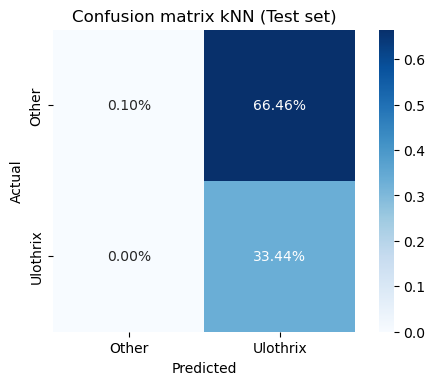

In [32]:
# test data
# predict test scaled
y_pred = knn.predict(X_te_scaled)
print(test_scores(y_pred, y_test))

map_confusion_matrix(y_test, y_pred, 'kNN', 'Test')

### Tuning hyperparameters kNN

In [ ]:
# set model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# find optimal k
k_range = list(range(3, 11))

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=kf, scoring='f1')

# fit the grid on train sets
grid.fit(X_train, y_train)

# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

### Model 2. Logistic regresssion

In [46]:
logReg = LogisticRegression(C=100, max_iter=500).fit(X_tr_rs, y_tr_rs)
baseline_model_balanced(logReg)

{'Train accuracy no val': 0.682,
 'Test accuracy': 0.661,
 'accuracy': 0.678,
 'precision': 0.683,
 'recall': 0.668,
 'f1': 0.675,
 'roc_auc': 0.738}

Test scores: 
{'accuracy': 0.661, 'precision': 0.494, 'recall': 0.644, 'f1': 0.559}


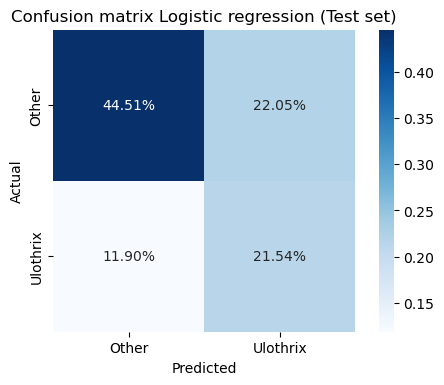

In [34]:
y_pred = logReg.predict(X_te_scaled)
print(test_scores(y_pred, y_test))
map_confusion_matrix(y_test, y_pred, 'Logistic regression', 'Test')

### Tree models as baseline

In [28]:
# decision tree
d_tree = DecisionTreeClassifier().fit(X_tr_rs, y_tr_rs)
baseline_model_balanced(d_tree)

{'Train accuracy no val': 1.0,
 'Test accuracy': 0.733,
 'accuracy': 0.854,
 'precision': 0.82,
 'recall': 0.911,
 'f1': 0.867,
 'roc_auc': 0.856}

In [ ]:
d_tree.get_depth()

In [ ]:
d_tree.get_n_leaves()

In [ ]:
d_tree.get_params(deep=True)

### Model 3. Random forests

In [29]:
rf = RandomForestClassifier(random_state=42).fit(X_tr_rs, y_tr_rs)
baseline_model_balanced(rf)

{'Train accuracy no val': 1.0,
 'Test accuracy': 0.8,
 'accuracy': 0.897,
 'precision': 0.879,
 'recall': 0.923,
 'f1': 0.9,
 'roc_auc': 0.964}

In [ ]:
# train
y_pred = rf.predict(X_tr_rs)
map_confusion_matrix(y_test, y_tr_rs, y_pred, 'Random forests', 'Train')

Test scores: 
{'accuracy': 0.8, 'precision': 0.724, 'recall': 0.65, 'f1': 0.685}


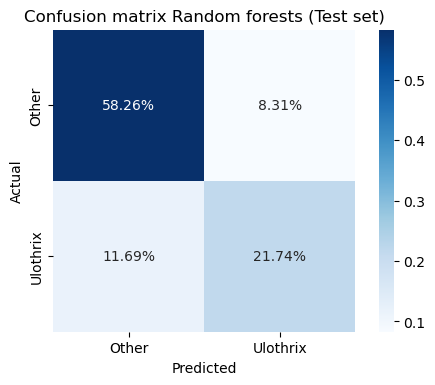

In [35]:
# test data - trained with resampled data
y_pred = rf.predict(X_te_scaled)
print(test_scores(y_pred, y_test))
map_confusion_matrix(y_test, y_pred, 'Random forests', 'Test')

**Model is too good predicting negative class vs positive class**

#### Feature importance Random forests

In [40]:
results = permutation_importance(rf, X_tr_rs, y_tr_rs, random_state=42)

In [41]:
forest_importances = pd.Series(results.importances_mean, index=X_train.columns).sort_values(ascending=False)

Text(0.5, 0, 'Mean accuracy decrease')

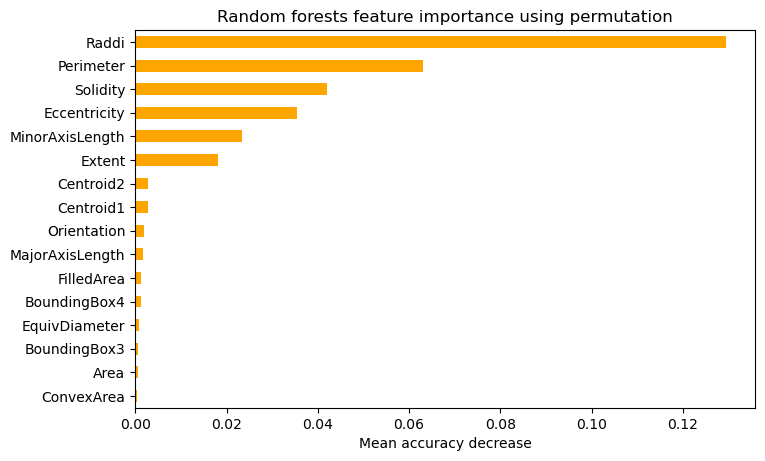

In [42]:
# plot feature importance
plt.figure(figsize=(8,5), dpi=100)
forest_importances.plot.barh(color='orange')

plt.title("Random forests feature importance using permutation")
plt.gca().invert_yaxis()
plt.xlabel("Mean accuracy decrease")

#### Tuning hyperparameters Random Forests with GridSearch

In [ ]:
# takes very long!!
# instantiate model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

n_estimators = [50, 100, 200, 300, 500] #100
max_depth = [5, 10, 15, 25, 30] #none
min_samples_split = [2, 8, 10, 20, 50] #2
min_samples_leaf = [1, 4, 6, 10] #1

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(rf, param_grid, cv=2, verbose=1, scoring='f1')

# fit the grid with entire datasets
grid.fit(X_train, y_train)

# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

### Model 4. GBM

In [37]:
gbm = GradientBoostingClassifier(random_state =42).fit(X_tr_rs, y_tr_rs)
baseline_model_balanced(gbm)

{'Train accuracy no val': 0.849,
 'Test accuracy': 0.734,
 'accuracy': 0.807,
 'precision': 0.788,
 'recall': 0.841,
 'f1': 0.814,
 'roc_auc': 0.893}

Test scores: 
{'accuracy': 0.734, 'precision': 0.581, 'recall': 0.736, 'f1': 0.65}


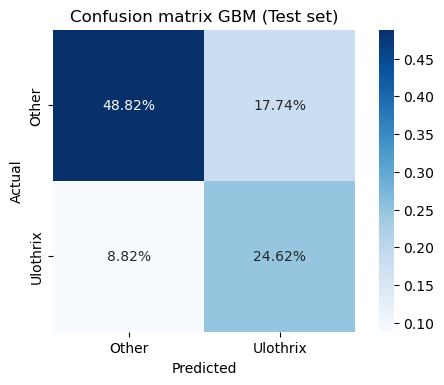

In [39]:
# test data
y_pred = gbm.predict(X_te_scaled)
print(test_scores(y_pred, y_test))

map_confusion_matrix(y_test, y_pred, 'GBM', 'Test')

### Comparing models

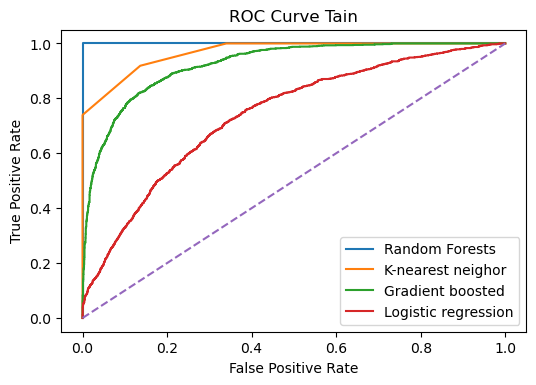

In [52]:
# roc curve train data - not balanced
plt.figure(figsize = [6,4], dpi=100)

fpr, tpr, thresholds = roc_curve(y_train, rf.predict_proba(X_tr_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_train, knn.predict_proba(X_tr_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_train, gbm.predict_proba(X_tr_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_train, logReg.predict_proba(X_tr_scaled)[:,1])
plt.plot(fpr, tpr)

# grids 
x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve Tain')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forests', 'K-nearest neighor', 'Gradient boosted', 'Logistic regression'])

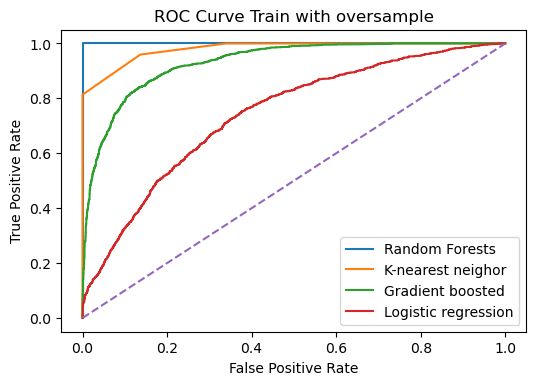

In [51]:
# roc curve train data - oversampled
plt.figure(figsize = [6,4], dpi=100)
fpr, tpr, thresholds = roc_curve(y_tr_rs, rf.predict_proba(X_tr_rs)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_tr_rs, knn.predict_proba(X_tr_rs)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_tr_rs, gbm.predict_proba(X_tr_rs)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_tr_rs, logReg.predict_proba(X_tr_rs)[:,1])
plt.plot(fpr, tpr)

# grids 
x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve Train with oversample')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forests', 'K-nearest neighor', 'Gradient boosted', 'Logistic regression'])

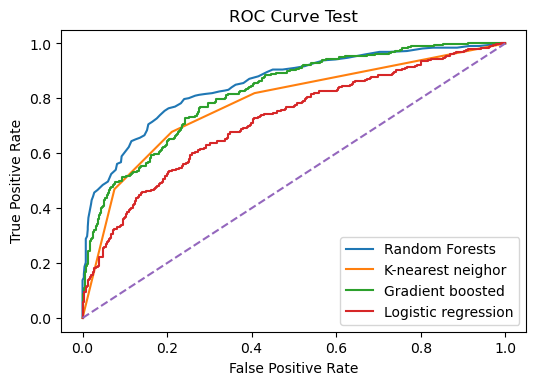

In [50]:
# roc curve train data - test
plt.figure(figsize = [6,4], dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_te_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_te_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_te_scaled)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(X_te_scaled)[:,1])
plt.plot(fpr, tpr)

# grids 
x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Forests', 'K-nearest neighor', 'Gradient boosted', 'Logistic regression'])